In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

plt.style.use('seaborn-talk')
%matplotlib inline

In [22]:
tn_movie_budgets = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
money_columns = ['production_budget','domestic_gross','worldwide_gross']
tn_movie_budgets[money_columns] = tn_movie_budgets[money_columns].replace([',','\$'], '', regex = True).astype(int)
tn_movie_budgets['profit'] = tn_movie_budgets['worldwide_gross'] - tn_movie_budgets['production_budget']
tn_movie_budgets['ROI'] = tn_movie_budgets['profit'] / tn_movie_budgets['production_budget']

tn_movie_budgets['movie'] = tn_movie_budgets['movie'].str.lower()
tn_movie_budgets['movie'] = tn_movie_budgets['movie'].replace([':','\.','\,',"'",'!'], '', regex = True)
tn_movie_budgets['movie'] = tn_movie_budgets['movie'].str.replace(r'(\w{2,})s\b', r'\1')

tn_movie_budgets['release_date'] = pd.to_datetime(tn_movie_budgets['release_date'])

tn_movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,ROI
0,1,2009-12-18,avatar,425000000,760507625,2776345279,2351345279,5.532577
1,2,2011-05-20,pirate of the caribbean on stranger tide,410600000,241063875,1045663875,635063875,1.546673
2,3,2019-06-07,dark phoenix,350000000,42762350,149762350,-200237650,-0.572108
3,4,2015-05-01,avenger age of ultron,330600000,459005868,1403013963,1072413963,3.243841
4,5,2017-12-15,star war ep viii the last jedi,317000000,620181382,1316721747,999721747,3.153696
...,...,...,...,...,...,...,...,...
5777,78,2018-12-31,red 11,7000,0,0,-7000,-1.000000
5778,79,1999-04-02,following,6000,48482,240495,234495,39.082500
5779,80,2005-07-13,return to the land of wonder,5000,1338,1338,-3662,-0.732400
5780,81,2015-09-29,a plague so pleasant,1400,0,0,-1400,-1.000000


In [14]:
tmbd_movies = pd.read_csv('zippedData/tmdb.movies.csv.gz')

tmbd_movies['original_title'] = tmbd_movies['original_title'].str.lower()
tmbd_movies['original_title'] = tmbd_movies['original_title'].replace([':','\.','\,',"'",'!'], '', regex = True)
tmbd_movies['original_title'] = tmbd_movies['original_title'].str.replace(r'(\w{2,})s\b', r'\1')

tmbd_movies['release_date'] = pd.to_datetime(tmbd_movies['release_date'])

tmbd_movies

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,harry potter and the deathly hallow part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,how to train your dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,iron man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,toy story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,laboratory condition,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_exhibit_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,the last one,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,trailer made,0.600,2018-06-22,Trailer Made,0.0,1


In [23]:
budg_genre = tn_movie_budgets.merge(tmbd_movies, left_on = ['movie','release_date'], right_on = ['original_title','release_date'])
budg_genre

,id_x,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,ROI,Unnamed: 0,genre_ids,id_y,original_language,original_title,popularity,title,vote_average,vote_count
0,1,2009-12-18,avatar,425000000,760507625,2776345279,2351345279,5.532577,6,"[28, 12, 14, 878]",19995,en,avatar,26.526,Avatar,7.4,18676
1,2,2011-05-20,pirate of the caribbean on stranger tide,410600000,241063875,1045663875,635063875,1.546673,2470,"[12, 28, 14]",1865,en,pirate of the caribbean on stranger tide,30.579,Pirates of the Caribbean: On Stranger Tides,6.4,8571
2,4,2015-05-01,avenger age of ultron,330600000,459005868,1403013963,1072413963,3.243841,14169,"[28, 12, 878]",99861,en,avenger age of ultron,44.383,Avengers: Age of Ultron,7.3,13457
3,7,2018-04-27,avenger infinity war,300000000,678815482,2048134200,1748134200,5.827114,23811,"[12, 28, 14]",299536,en,avenger infinity war,80.773,Avengers: Infinity War,8.3,13948
4,9,2017-11-17,justice league,300000000,229024295,655945209,355945209,1.186484,20623,"[28, 12, 14, 878]",141052,en,justice league,34.953,Justice League,6.2,7510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1452,22,2014-02-14,down and dangerou,50000,0,0,-50000,-1.000000,11924,"[80, 53, 18]",164286,en,down and dangerou,2.621,Down and Dangerous,4.3,9
1453,25,2015-09-01,run hide die,50000,0,0,-50000,-1.000000,17277,"[53, 27]",290391,en,run hide die,0.600,"Run, Hide, Die",3.5,2
1454,38,2016-03-18,krisha,30000,144822,144822,114822,3.827400,14760,[18],323929,en,krisha,5.288,Krisha,6.8,86
1455,38,2016-03-18,krisha,30000,144822,144822,114822,3.827400,18030,[18],323929,en,krisha,5.288,Krisha,6.8,86


In [26]:
romance_df = budg_genre.loc[budg_genre['genre_ids'].str.contains('10749'), ['movie','production_budget','profit','ROI','release_date'] ].sort_values(by = 'release_date')
romance_df

,movie,production_budget,profit,ROI,release_date
844,big,18000000,133668774,7.426043,1988-06-03
845,big,18000000,133668774,7.426043,1988-06-03
1105,howard end,8000000,18317943,2.289743,1992-03-13
967,american pie,12000000,222723148,18.560262,1999-07-09
388,the break-up,52000000,153727307,2.956294,2006-06-02
...,...,...,...,...,...
559,adrift,35000000,22897191,0.654205,2018-06-01
604,crazy rich asian,30000000,208099711,6.936657,2018-08-15
532,a star is born,36000000,397449571,11.040266,2018-10-05
984,if beale street could talk,12000000,7859167,0.654931,2018-12-14


In [53]:
#romance_df['in_feb'] = romance_df.loc[romance_df['release_date'] >= pd.Timestamp('2019-03-06')) & (df.datetime < pd.Timestamp('2019-03-07')



romance_df['month'] = romance_df['release_date'].dt.month
romance_df['day'] = romance_df['release_date'].dt.day

print(romance_df.loc[romance_df.month == 2 ].ROI.median())
print(romance_df.loc[romance_df.month == 12 ].ROI.median())
print(romance_df.ROI.median())


romance_df['holiday'] = 'other'
romance_df.loc[romance_df.month == 2,['holiday']] = 'valentines'
romance_df.loc[romance_df.month == 12,['holiday']] = 'christmas'

display(romance_df)

1.5003096692307691
1.7476333818181817
1.32938248


,movie,production_budget,profit,ROI,release_date,month,day,holiday
844,big,18000000,133668774,7.426043,1988-06-03,6,3,other
845,big,18000000,133668774,7.426043,1988-06-03,6,3,other
1105,howard end,8000000,18317943,2.289743,1992-03-13,3,13,other
967,american pie,12000000,222723148,18.560262,1999-07-09,7,9,other
388,the break-up,52000000,153727307,2.956294,2006-06-02,6,2,other
...,...,...,...,...,...,...,...,...
559,adrift,35000000,22897191,0.654205,2018-06-01,6,1,other
604,crazy rich asian,30000000,208099711,6.936657,2018-08-15,8,15,other
532,a star is born,36000000,397449571,11.040266,2018-10-05,10,5,other
984,if beale street could talk,12000000,7859167,0.654931,2018-12-14,12,14,christmas


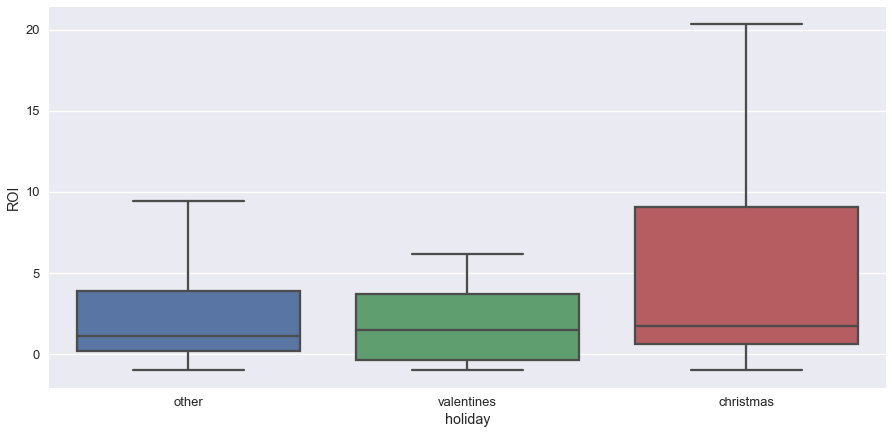

In [59]:
fig, ax = plt.subplots(figsize = (15,7))

ax = sns.boxplot(x = romance_df['holiday'], y = romance_df['ROI'], showfliers = False)
#ax.set_title("ROI Comparison for Movies with 'Wedding' and 'Love' in Title");

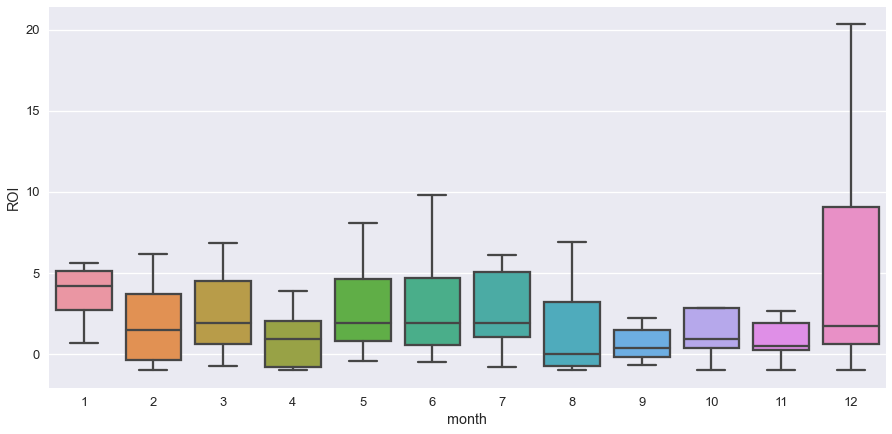

In [67]:
fig, ax = plt.subplots(figsize = (15,7))

ax = sns.boxplot(x = romance_df['month'], y = romance_df['ROI'], showfliers = False)

In [62]:
horror_df = budg_genre.loc[budg_genre['genre_ids'].str.contains('27'), ['movie','production_budget','profit','ROI','release_date'] ].sort_values(by = 'release_date')

horror_df['month'] = horror_df['release_date'].dt.month
horror_df['day'] = horror_df['release_date'].dt.day

print(horror_df.loc[horror_df.month == 10 ].ROI.median())
print(horror_df.ROI.median())


horror_df['holiday'] = 'other'
horror_df.loc[horror_df.month == 10,['holiday']] = 'halloween'


horror_df

1.6397494
1.9241401666666667


,movie,production_budget,profit,ROI,release_date,month,day,holiday
800,from dusk till dawn,20000000,5732986,0.286649,1996-01-19,1,19,other
444,blade,45000000,86237688,1.916393,1998-08-21,8,21,other
82,van helsing,170000000,130150546,0.765591,2004-05-07,5,7,other
1377,saw,1200000,102680027,85.566689,2004-10-29,10,29,halloween
313,blade trinity,65000000,66353165,1.020818,2004-12-08,12,8,other
...,...,...,...,...,...,...,...,...
549,goosebump 2 haunted halloween,35000000,58291478,1.665471,2018-10-12,10,12,halloween
1011,halloween,10000000,244900667,24.490067,2018-10-19,10,19,halloween
823,suspiria,20000000,-12965385,-0.648269,2018-10-26,10,26,halloween
1149,the possession of hannah grace,6000000,36785387,6.130898,2018-11-30,11,30,other


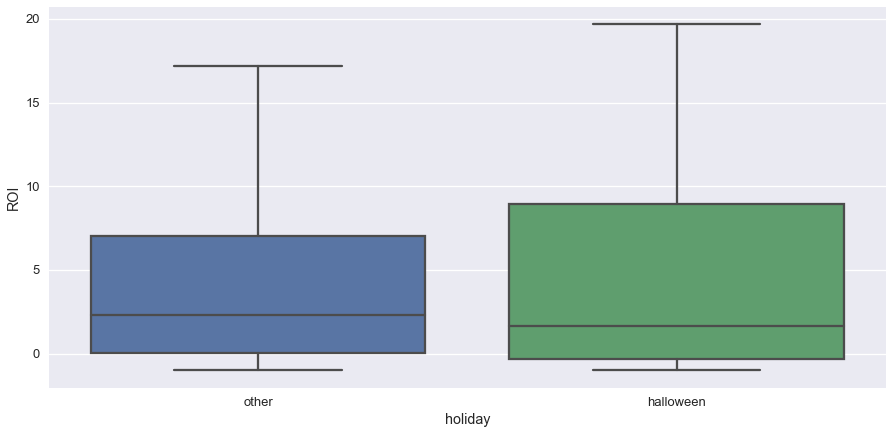

In [66]:
fig, ax = plt.subplots(figsize = (15,7))

ax = sns.boxplot(x = horror_df['holiday'], y = horror_df['ROI'], showfliers = False)

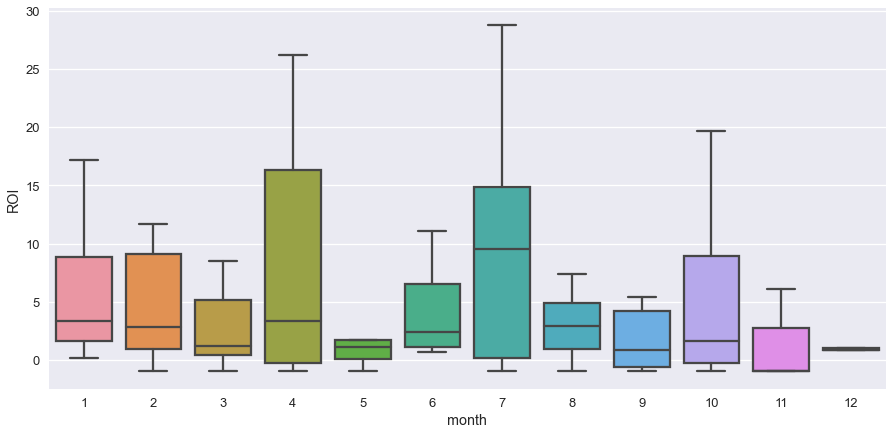

In [71]:
fig, ax = plt.subplots(figsize = (15,7))

ax = sns.boxplot(x = horror_df['month'], y = horror_df['ROI'], showfliers = False)

In [69]:
horror_df.loc[horror_df.month == 12]

,movie,production_budget,profit,ROI,release_date,month,day,holiday
313,blade trinity,65000000,66353165,1.020818,2004-12-08,12,8,other
575,the darkest hour,34800000,28031715,0.805509,2011-12-25,12,25,other
1010,the last day on mar,10600000,-10338636,-0.975343,2013-12-06,12,6,other
900,krampu,15000000,46788393,3.119226,2015-12-04,12,4,other
1199,incarnate,5000000,4371036,0.874207,2016-12-02,12,2,other
